# Chapter 10-deeplearning-lab



# Lab: Deep Learning

In this section, we show how to fit the examples discussed in the text. We use the `keras` package, which interfaces to the
`tensorflow` package which in turn links to efficient
`python` code. This code is
impressively fast, and the package is well-structured.
#### Important note: In order to run this python notebook you need the following dependencies
pandas; numpy; matplotlib (for ploting figures); pyreader (for reading R data); scikit-learn (for machine learning models); keras (for deep learning models); tensorflow (for running keres in the backend); If your machine don't have these libraries installed, you will see an error when you try to run this module. If you encounter an error first install the libraries. 

## Single Layer Network on Hitters Data

We start by fitting the models in Section 10.6.
We set up the data, and separate out a training and
test set.

In [1]:
#!pip install pyreadr

In [1]:
#%tensorflow_version 1.x

In [2]:
# get some python librarys. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pyreadr
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
import sklearn.linear_model  as LM 

import warnings
warnings.filterwarnings("ignore")


In [3]:
# read data from the folder. Make sure to put your data folder in the same file as you python notebook folder
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd "/content/gdrive/MyDrive/dtyudesktop/Teaching/FinTech410/statistical-learning/Ch_10_Deep_Learning"

/content/gdrive/MyDrive/dtyudesktop/Teaching/FinTech410/statistical-learning/Ch_10_Deep_Learning


In [5]:
# read data from the folder. Make sure to put your data folder in the same file as you python notebook folder
Data = pyreadr.read_r('data/Hitters.rda')
Data = Data['Hitters']

In [6]:
#Drop Missing Values
Data.dropna(inplace = True)
n = Data.shape[0]


In [7]:
# there are some catagorical variables convert them to numeric
Data.dtypes


AtBat           int32
Hits            int32
HmRun           int32
Runs            int32
RBI             int32
Walks           int32
Years           int32
CAtBat          int32
CHits           int32
CHmRun          int32
CRuns           int32
CRBI            int32
CWalks          int32
League       category
Division     category
PutOuts         int32
Assists         int32
Errors          int32
Salary        float64
NewLeague    category
dtype: object

In [8]:
cat_columns = Data.select_dtypes(['category']).columns


In [9]:
Data[cat_columns] = Data[cat_columns].apply(lambda x: x.cat.codes)

In [10]:
Data.head(10)

AtBat  Hits  HmRun  ...  Errors    Salary  NewLeague
rownames                               ...                             
-Alan Ashby          315    81      7  ...      10   475.000          1
-Alvin Davis         479   130     18  ...      14   480.000          0
-Andre Dawson        496   141     20  ...       3   500.000          1
-Andres Galarraga    321    87     10  ...       4    91.500          1
-Alfredo Griffin     594   169      4  ...      25   750.000          0
-Al Newman           185    37      1  ...       7    70.000          0
-Argenis Salazar     298    73      0  ...       9   100.000          0
-Andres Thomas       323    81      6  ...      19    75.000          1
-Andre Thornton      401    92     17  ...       0  1100.000          0
-Alan Trammell       574   159     21  ...      22   517.143          0

[10 rows x 20 columns]

In [11]:
X_Data = Data.drop('Salary', axis=1)
Y_Data = Data['Salary']

#get_train test sample 

X_train, X_test, y_train, y_test = train_test_split(X_Data,Y_Data, test_size=0.33, random_state=42)

To fit the neural network, we first set up a model structure
that describes the network.

In [12]:
#fit Linear Model

lfit = LM.LinearRegression().fit(X_train, y_train.values)
lpred = lfit.predict(X_test)
#Calculate mean absolute error for the linear model predction
np.mean(np.abs(lpred - y_test.values))

260.490338223334

In [13]:
## Fit LASSO 
clf = LM.Lasso(alpha=0.1)
lassofit = clf.fit(X_train, y_train.values)

lassopred = lassofit.predict(X_test)
#Calculate mean absolute error for the linear model predction
np.mean(np.abs(lassopred - y_test.values))

261.3567020157336

### A simple vanila deep neural network 

In [14]:
# we need to import keres libraries. 
import tensorflow as tf 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
# Neural network
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1000      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


We have created a vanilla model
object called `model`, and have added details about the successive
layers in a sequential manner, using the function `keras_model_sequential()`.
model.summary() print the structure of the keres network


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=["mean_absolute_error"])


Next we add details to  `model` that control the fitting
algorithm. Here we have simply followed the examples given in
the Keras book. We minimize squared-error loss as in
(10.22). The algorithm
tracks the mean absolute error on the training data, and
on validation data if it is supplied.

In the previous line, the operator passes `model` as the first argument to `compile()`. The `compile()` function does not actually change the python
object `model`, but it does communicate these specifications to
the corresponding `python` instance of this model that has been created
along the way.

Now we fit the model. We supply the training data and  two
fitting parameters, `epochs` and `batch\_size`. Using 32
for the latter means that at each step of SGD, the algorithm randomly
selects 32 training observations for the computation of the gradient. Recall from
Sections 10.4 and 10.7
that an epoch amounts to the number of SGD steps required to process $n$
observations. Since the training set has
$n=176$, an epoch is $176/32=5.5$ SGD steps. The `fit()` function has an argument
`validation_data`; these data are not used in the fitting,
but can be used to track the progress of the model (in this case reporting
mean absolute error). Here we
actually supply the test data so we can see mean absolute error of both the
training data and test data as the epochs proceed. To see more options
for fitting, use `?fit.keras.engine.training.Model`.

In [17]:
#history = model.fit(X_train, y_train.values, epochs=100, batch_size=32)

history = model.fit(X_train, y_train.values,validation_data = (X_test,y_test.values), epochs=50, batch_size=32)

Epoch 1/50
6/6 [==============================] - 1s 51ms/step - loss: 796930.8125 - mean_absolute_error: 645.2799 - val_loss: 514351.2500 - val_mean_absolute_error: 533.5120
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 430758.1875 - mean_absolute_error: 477.6399 - val_loss: 368376.8750 - val_mean_absolute_error: 418.4431
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 344336.8750 - mean_absolute_error: 407.6678 - val_loss: 272817.2500 - val_mean_absolute_error: 335.2208
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 425036.6250 - mean_absolute_error: 422.6368 - val_loss: 227129.3750 - val_mean_absolute_error: 295.5957
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 280586.1250 - mean_absolute_error: 359.4507 - val_loss: 209993.3281 - val_mean_absolute_error: 285.0535
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 370491.1250 - mean_absolute_error: 389.0363 - val_loss: 

*(Here and elsewhere we have reduced the number of epochs to make
    runtimes manageable; users can of course change back)*

We can plot the `history` to display the mean absolute error for the training and test data. 

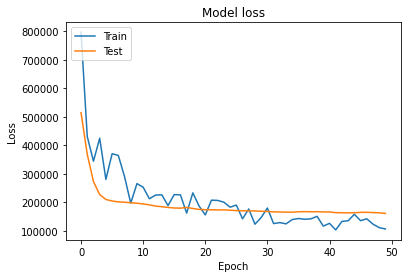

In [18]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Finally, we predict from the final model, and
evaluate its performance on the test data. Due to the use of SGD, the results vary slightly with each
fit. Unfortunately the `set.seed()` function does not ensure
identical results (since the fitting is done in `python`), so your results will differ slightly.


In [19]:

#check the prediction accuracy
y_pred = model.predict(X_test).reshape(-1)
np.mean(np.abs(y_pred - y_test.values))

235.54721580867113

##MNIST Data Set

## Multilayer Network on the MNIST Digit Data

The `keras` package comes with a number of example datasets,
including the `MNIST` digit data. Our first step is to load the
`MNIST` data. The `dataset_mnist()` function is provided for this purpose.

In [28]:
## Get libraries for tensorflow and keres. 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import backend as K

from tensorflow.keras import callbacks

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
#from tensorflow.keras.utils import to_categorical




In [22]:
## load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [23]:
print('Train data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


There are 60,000 images in the training data and 10,000 in the test data. The images are $28\times 28$, and stored as a three-dimensional array,
so we need to reshape them into a matrix.  Also, we need to ``one-hot''
encode the class label. Luckily `keras` has a lot of built-in
functions that do this for us.

In [24]:
# input image dimensions
img_rows, img_cols = 28, 28

In [25]:
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
#input_shape = (img_rows, img_cols, 1)

In [26]:
from keras.utils import np_utils


In [27]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
keras.utils.np_utils.to_categorical


#y_train = to_categorical(y_train, num_classes)
#y_test =  to_categorical(y_test, num_classes)

<function keras.utils.np_utils.to_categorical>

In [28]:
y_train.shape 

#print(tf.__version__)

(60000, 10)

In [29]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Neural networks are somewhat sensitive to the scale of the inputs. For example, ridge and
lasso regularization are affected by scaling.  Here the inputs are eight-bit
(Note: Eight bits means $2^8$, which equals 256. Since the convention
is to start at $0$, the possible values  range from $0$ to $255$.)
grayscale values between 0 and 255, so we rescale to the unit
interval.

In [30]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [31]:
x_train.shape

(60000, 784)

Now we are ready to fit our neural network.

In [32]:
# Neural network
model = Sequential()
model.add(Dense(256, input_dim= x_train.shape[1], activation='relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(10,  activation = "softmax"))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


The first layer goes from  $28\times28=784$ input units to a hidden
layer of $256$ units, which uses the ReLU activation function.
This is specified by a call to `layer\_dense()`, which takes as
input a `modelnn` object, and returns a modified `modelnn`
object.
This is then piped through `layer\_dropout()` to perform
dropout regularization. The second hidden layer comes
next, with $128$ hidden units, followed by a  dropout layer.
The final layer is the output layer, with activation
`"softmax"` (10.12) for the 10-class classification
problem, which defines the map from the second hidden layer to class
probabilities.
Finally, we use `summary()` to summarize the model, and to make sure we got it
all right.


In [34]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = tf.keras.optimizers.RMSprop(), metrics = tf.keras.metrics.Accuracy())

Now we are ready to go. The final step is to supply training data, and fit the model.

In [35]:
history = model.fit(x_train, y_train, epochs=25, batch_size = 128, verbose=1, 
                    validation_split=0.2, 
                    callbacks=[callbacks.EarlyStopping(
                        monitor="val_loss", patience=10, restore_best_weights=True)])

Epoch 1/25
375/375 [==============================] - 4s 10ms/step - loss: 0.4539 - accuracy: 4.3750e-05 - val_loss: 0.1740 - val_accuracy: 3.3333e-05
Epoch 2/25
375/375 [==============================] - 3s 9ms/step - loss: 0.2136 - accuracy: 6.3125e-04 - val_loss: 0.1253 - val_accuracy: 8.5833e-04
Epoch 3/25
375/375 [==============================] - 3s 9ms/step - loss: 0.1620 - accuracy: 0.0022 - val_loss: 0.1073 - val_accuracy: 0.0020
Epoch 4/25
375/375 [==============================] - 3s 9ms/step - loss: 0.1380 - accuracy: 0.0039 - val_loss: 0.1020 - val_accuracy: 0.0063
Epoch 5/25
375/375 [==============================] - 3s 9ms/step - loss: 0.1245 - accuracy: 0.0065 - val_loss: 0.0922 - val_accuracy: 0.0078
Epoch 6/25
375/375 [==============================] - 3s 9ms/step - loss: 0.1108 - accuracy: 0.0090 - val_loss: 0.0934 - val_accuracy: 0.0101
Epoch 7/25
375/375 [==============================] - 3s 9ms/step - loss: 0.1034 - accuracy: 0.0120 - val_loss: 0.0935 - val_accura

We have suppressed the output here, which is a progress report on the
fitting of the model, grouped by epoch. This is very useful, since on
large datasets fitting can take time.
Here we specified a validation split of 20%, so the training is actually performed on
80% of the 60,000 observations in the training set. This is an
alternative to actually supplying validation data, like we did in
Section 10.9.1. See
`?fit.keras.engine.training.Model` for all the optional fitting arguments. SGD  uses batches
of 128 observations in computing the gradient, and doing the
arithmetic, we see that an epoch corresponds to 375 gradient steps.


To obtain the test error in Table 10.1, we first write
a simple function `accuracy()` that compares predicted and true
class labels, and then use it to evaluate our predictions.

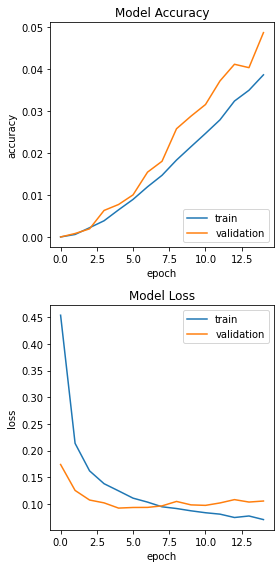

In [36]:
# plotting the metrics
fig = plt.figure(figsize =(4,8))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [37]:
# Check  Training Accuracy 
Train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', Train_score[0])
print('Train accuracy:', Train_score[1])

Train loss: 0.06102665141224861
Train accuracy: 0.007136666681617498


In [38]:
# Check Testing Accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08750897645950317
Test accuracy: 0.0071299998089671135


### Convolutional Neural Networks

#### Instead of using a recurrent neural network for image prediction we can use a CNN 
First we apply CNN on  MNIST data and see the improvemnt.
Then, we fit a CNN to the `CIFAR` data, which is available in the `keras`
package. It is arranged in a similar fashion as the `MNIST` data.

In [20]:
## load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


NameError: ignored

#### Instead of reshaping the data into a matrix now we are reshaping the data in a four dimensional tensor and performing the other data cleaning procedure as the earlier section. 

In [40]:

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [41]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [42]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [43]:
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)


y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


In [44]:
## Build Our Model 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

We fit the model just as before.

In [45]:
#CAUTION:  DEEP CNN, MIGHT TAKE FEW MINUTES (HOUR) TO CONVERGE
hist = model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          verbose=1, validation_split=0.2,
                 callbacks=[callbacks.EarlyStopping(
                     monitor="val_loss", patience=10, restore_best_weights=True)])

Epoch 1/15
375/375 [==============================] - 120s 317ms/step - loss: 2.2885 - accuracy: 0.1258 - val_loss: 2.2483 - val_accuracy: 0.3315
Epoch 2/15
375/375 [==============================] - 120s 320ms/step - loss: 2.2336 - accuracy: 0.2350 - val_loss: 2.1845 - val_accuracy: 0.5447
Epoch 3/15
375/375 [==============================] - 120s 319ms/step - loss: 2.1700 - accuracy: 0.3334 - val_loss: 2.1086 - val_accuracy: 0.6110
Epoch 4/15
375/375 [==============================] - 120s 320ms/step - loss: 2.0953 - accuracy: 0.4142 - val_loss: 2.0140 - val_accuracy: 0.6533
Epoch 5/15
375/375 [==============================] - 120s 319ms/step - loss: 2.0023 - accuracy: 0.4749 - val_loss: 1.8974 - val_accuracy: 0.6920
Epoch 6/15
375/375 [==============================] - 120s 319ms/step - loss: 1.8898 - accuracy: 0.5208 - val_loss: 1.7592 - val_accuracy: 0.7265
Epoch 7/15
375/375 [==============================] - 120s 319ms/step - loss: 1.7601 - accuracy: 0.5570 - val_loss: 1.6030 -

In [46]:
# Check  Training Accuracy 
Train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', Train_score[0])
print('Train accuracy:', Train_score[1])


Train loss: 0.739126443862915
Train accuracy: 0.833816647529602


In [47]:
# Check Testing Accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.7145246267318726
Test accuracy: 0.8478000164031982


#### You can see the significance improvement in the accuracy from the MLP 

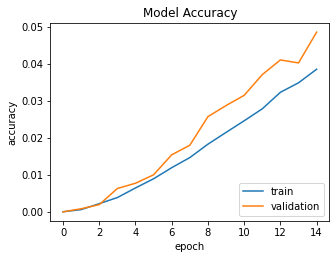

In [48]:

# plotting the metrics
fig = plt.figure(figsize =(5,8))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In this section we fit a CNN to the `CIFAR` data, which is available in the `keras`
package. It is arranged in a similar fashion as the `MNIST` data.

First - Get `CIFAR` Data 

The example below loads the CIFAR-100 dataset using the Keras API and creates a plot of the first nine images in the training dataset. The data is huge, might take some time to download.

In [29]:
from tensorflow.keras.datasets import cifar100

In [30]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

The array of 50,000 training images has four dimensions:
  each three-color image is represented as a set of three channels, each of which consists of
$32\times 32$ eight-bit pixels. We standardize as we did for the
digits, but keep the array structure. We one-hot encode the response
factors  to produce a 100-column binary matrix.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 32, 32, 3)


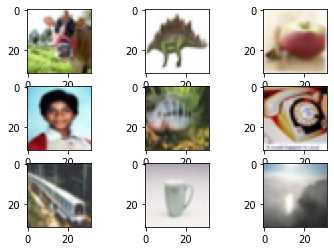

In [31]:
# summarize loaded dataset and print fist 9 pictures of the data
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, x_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [32]:
# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = x_train / 255
x_test = x_test / 255




In [33]:
# convert terget to one hot encoding
#y_train = keras.utils.to_categorical(y_train, 100)
#y_test = keras.utils.to_categorical(y_test, 100)
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

In [34]:
#If you are running multiple keras model, it is better to restart the session with clear session
#This will allow you the machine to remove previous learned weigt (for some other model) and free up the space for new learning. 
tf.keras.backend.clear_session()


In [35]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = "same", activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(rate = 0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [36]:

# Compile the model
model.compile(loss= categorical_crossentropy, 
              optimizer= 'adam',
              metrics=['accuracy'])



In [37]:
# Fit data to model
# CAUTION it might take some time, I only use 10 epoc to make runtimes manageable;
# For an optimal performance you might need to set epoc 50-100, which might increase the runtime significantly)
history = model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            verbose=1, validation_split=0.2)



Epoch 1/10
313/313 [==============================] - 136s 432ms/step - loss: 4.1217 - accuracy: 0.0667 - val_loss: 3.6895 - val_accuracy: 0.1331
Epoch 2/10
313/313 [==============================] - 136s 434ms/step - loss: 3.4510 - accuracy: 0.1706 - val_loss: 3.1609 - val_accuracy: 0.2205
Epoch 3/10
313/313 [==============================] - 135s 432ms/step - loss: 3.0638 - accuracy: 0.2420 - val_loss: 2.8754 - val_accuracy: 0.2860
Epoch 4/10
313/313 [==============================] - 136s 434ms/step - loss: 2.8256 - accuracy: 0.2865 - val_loss: 2.7636 - val_accuracy: 0.3061
Epoch 5/10
313/313 [==============================] - 135s 433ms/step - loss: 2.6279 - accuracy: 0.3220 - val_loss: 2.6026 - val_accuracy: 0.3354
Epoch 6/10
313/313 [==============================] - 135s 433ms/step - loss: 2.4598 - accuracy: 0.3599 - val_loss: 2.4633 - val_accuracy: 0.3709
Epoch 7/10
313/313 [==============================] - 136s 433ms/step - loss: 2.3111 - accuracy: 0.3902 - val_loss: 2.3836 -

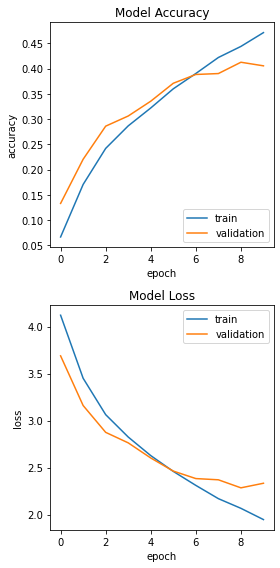

In [38]:
# plotting the error and accuracy metrics
fig = plt.figure(figsize =(4,8))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')


plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.show()

In [39]:
# Generate generalization metrics 
# lets see the prediction accuracy on test sample 
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.2743759155273438 / Test accuracy: 0.41780000925064087


This model takes 20 minutes to run and achieves 46% accuracy on the test
data. Although this is not terrible for 100-class data (a random
classifier gets 1% accuracy), searching the web we see results around
75%. Typically it takes a lot of architecture carpentry,
fiddling with regularization, and time to achieve such results.


## Using Pretrained CNN Models

We now show how to use a CNN pretrained on the  `imagenet` database to classify natural
images, and demonstrate how we produced Figure ???.
We copied six jpeg images from a digital photo album into the
directory `book_images`. (These images are available
  from the data section of  [www.statlearning.com](www.statlearning.com), the ISL book website. Download `book_images.zip`; when
clicked it creates the `book_images` directory.) We first read in the images, and
convert them into the array format expected by the `keras`
software to match the specifications in `imagenet`. Make sure that your working directory in `R` is set to the folder in which the images are stored.

In [40]:
#Get the iamagenet data and realted libraries
##We then load the trained network. The model has 50 layers, with a fair bit of complexity.
import os
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [41]:
# here we import the book images and transform the matrix into arrays, and then stor the images in X_img arrray. 

img_dir = 'data/book_images/'
image_names  = os.listdir(img_dir)

num_images = len(image_names)

X_img =  np.empty((num_images, 224, 224, 3))

for i in range(0, num_images):
    img_path = img_dir+image_names[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    X_img[i] = x


In [42]:
##load the weight of imagenet data
model = ResNet50(weights='imagenet')


102981632/102967424 [==============================] - 1s 0us/step


Finally, we classify our six images, and return the top three class
choices in terms of predicted probability for each.

In [43]:
preds = model.predict(X_img)

In [44]:
# decode the results into a list of tuples (class, description, probability)
# and print the top 4 prediction along with the original image name: 
# (one such list for each sample in the batch)
for i in range(0, num_images):
    print(image_names[i], 'Predicted:', decode_predictions(preds, top=4)[i] )
#print('Predicted:', decode_predictions(preds, top=3))

49152/35363 [=========================================] - 0s 0us/step
weaver.jpg Predicted: [('n01843065', 'jacamar', 0.4865984), ('n01818515', 'macaw', 0.23028944), ('n02494079', 'squirrel_monkey', 0.044570986), ('n01560419', 'bulbul', 0.037763286)]
hawk.jpg Predicted: [('n03388043', 'fountain', 0.27721676), ('n03532672', 'hook', 0.17947038), ('n03804744', 'nail', 0.110358216), ('n01945685', 'slug', 0.04639993)]
huey.jpg Predicted: [('n02097474', 'Tibetan_terrier', 0.5246219), ('n02098413', 'Lhasa', 0.40590084), ('n02094114', 'Norfolk_terrier', 0.016995287), ('n02098105', 'soft-coated_wheaten_terrier', 0.016733952)]
kitty.jpg Predicted: [('n02105641', 'Old_English_sheepdog', 0.83900225), ('n02086240', 'Shih-Tzu', 0.04235823), ('n03223299', 'doormat', 0.03226584), ('n02123394', 'Persian_cat', 0.022754196)]
flamingo.jpg Predicted: [('n02007558', 'flamingo', 0.93010926), ('n02006656', 'spoonbill', 0.06801473), ('n02002556', 'white_stork', 0.0011723705), ('n02002724', 'black_stork', 0.000

## IMDb Document Classification

Now we perform document classification (Section ???) on the `IMDB` dataset, which is available as part of the `keras`
package. We  limit the dictionary size to the
10,000  most frequently-used words and tokens.

In [45]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
#data = np.concatenate((training_data, testing_data), axis=0)
#targets = np.concatenate((training_targets, testing_targets), axis=0)

17473536/17464789 [==============================] - 0s 0us/step


Each element of `x_train` is a vector of numbers between 0 and
9999 (the document), referring to the words found in the dictionary.
For example, the first training document is the positive review on. Lets see the output and the review of first 
training data

In [46]:
print('the review is:', y_train[0])

the review is: 1


In [47]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in x_train[0]] )
print(decoded) 

1654784/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Above you can see the first review of the dataset, which is labeled as positive (1). The code below retrieves the dictionary mapping word indices back into the original words so that we can read them. It replaces every unknown word with a “#”. It does this by using the get_word_index() function.

Now it's time to prepare our data. We will vectorize every review and fill it with zeros so it contains exactly 10,000 numbers. That means we fill every review that is shorter than 10,000 with zeros. We need to do this because the biggest review is nearly that long and every input for our neural network needs to have the same size. We will also transform the targets into floats.



In [48]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 

x_train_v = vectorize(x_train)
x_test_v = vectorize(x_test)

y_train  = np.array(y_train).astype("float32")
y_test  = np.array(y_test).astype("float32")

Now we're ready to build our simple neural network. We'll start by defining the type of model we want to build. 

In [49]:
tf.keras.backend.clear_session()

In [50]:
model = Sequential()
# Input - Layer
model.add(Dense(32, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Dense(16, activation = "relu"))
# Output- Layer
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,577
Trainable params: 320,577
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [52]:
# Fit data to model
history = model.fit(x_train_v, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)


Epoch 1/20
157/157 [==============================] - 3s 13ms/step - loss: 0.4250 - accuracy: 0.8105 - val_loss: 0.2770 - val_accuracy: 0.8892
Epoch 2/20
157/157 [==============================] - 2s 12ms/step - loss: 0.2151 - accuracy: 0.9207 - val_loss: 0.2683 - val_accuracy: 0.8918
Epoch 3/20
157/157 [==============================] - 2s 12ms/step - loss: 0.1445 - accuracy: 0.9485 - val_loss: 0.3006 - val_accuracy: 0.8842
Epoch 4/20
157/157 [==============================] - 2s 12ms/step - loss: 0.0948 - accuracy: 0.9671 - val_loss: 0.3512 - val_accuracy: 0.8850
Epoch 5/20
157/157 [==============================] - 2s 12ms/step - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.4373 - val_accuracy: 0.8832
Epoch 6/20
157/157 [==============================] - 2s 12ms/step - loss: 0.0356 - accuracy: 0.9899 - val_loss: 0.5032 - val_accuracy: 0.8786
Epoch 7/20
157/157 [==============================] - 2s 12ms/step - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.5475 - val_accuracy: 0.8760

In [53]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [54]:
# Generate generalization metrics
score = model.evaluate(x_train_v, y_train, verbose=0)
print(f'train loss: {score[0]} / Train accuracy: {score[1]}')

train loss: 0.18837377429008484 / Train accuracy: 0.9750400185585022


In [55]:
# Generate generalization metrics
score = model.evaluate(x_test_v, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.0155800580978394 / Test accuracy: 0.8608400225639343


###  Time Series Prediction

We now show how to fit the models in Section ???
for  time series prediction.
We first set up the data, and standardize each of the variables.

We are using NYSE data

In [56]:

Data = pyreadr.read_r('data/NYSE.rda')
Data = Data['NYSE']

In [58]:
Data.head

<bound method NDFrame.head of             date day_of_week  DJ_return  log_volume  log_volatility  train
0     1962-12-03         mon  -0.004461    0.032573      -13.127403   True
1     1962-12-04        tues   0.007813    0.346202      -11.749305   True
2     1962-12-05         wed   0.003845    0.525306      -11.665609   True
3     1962-12-06        thur  -0.003462    0.210182      -11.626772   True
4     1962-12-07         fri   0.000568    0.044187      -11.728130   True
...          ...         ...        ...         ...             ...    ...
6046  1986-12-24         wed   0.006514   -0.236104       -9.807366  False
6047  1986-12-26         fri   0.001825   -1.322425       -9.906025  False
6048  1986-12-29         mon  -0.009515   -0.371237       -9.827660  False
6049  1986-12-30        tues  -0.001837   -0.385638       -9.926091  False
6050  1986-12-31         wed  -0.006655   -0.264986       -9.935527  False

[6051 rows x 6 columns]>

The  variable `istrain` contains a `TRUE` for each year that  is in the training set, and a `FALSE` for each year
 in the test set.

We first write functions to create lagged versions of the three time series.  We start with a function that takes as input a data
matrix and a lag $L$, and returns a lagged version of the matrix. It
simply inserts $L$ rows of `NA` at the top, and truncates the
bottom.

In [59]:
Data_v = Data[['date', 'log_volume', 'train']]
Data_v['lag_1']= Data_v['log_volume'].shift(1)
Data_v['lag_2']= Data_v['log_volume'].shift(2)
Data_v['lag_3']= Data_v['log_volume'].shift(3)
Data_v['lag_4']= Data_v['log_volume'].shift(4)
Data_v['lag_5']= Data_v['log_volume'].shift(5)


If we look at the first five rows of this frame, we will see some
missing values in the lagged variables (due to the construction above). We remove these rows, and adjust `istrain`
accordingly.

In [60]:
Data_v.dropna(inplace = True)

In [61]:
Data_v.shape

(6046, 8)

In [62]:
train_data = Data_v[Data_v['train']==True]
test_data = Data_v[Data_v['train']==False]

X_train  = train_data[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train = train_data['log_volume']


X_test  =test_data[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_test = test_data['log_volume']

We now fit the linear regression model to the training data using `lm()`, and predict on the
test data.

In [64]:

lfit = LM.LinearRegression().fit(X_train, y_train.values)
lpred = lfit.predict(X_test)
#Calculate mean absolute error for the linear model predction
np.mean(np.abs(lpred - y_test.values))

0.14088305311379024

In [65]:
# calculaate R^2 of the result 
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test.values, lpred)

0.37324147593449986

In [67]:
#set up a deep neural network for time seris prediction

In [68]:
tf.keras.backend.clear_session()

In [69]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [70]:
model.compile(loss='mse', optimizer='adam', metrics=["mean_absolute_error"])

In [71]:
#history = model.fit(X_train, y_train.values, epochs=100, batch_size=32)

history = model.fit(X_train, y_train.values,validation_data = (X_test,y_test.values), epochs=100, batch_size=32)

Epoch 1/100
134/134 [==============================] - 1s 4ms/step - loss: 0.0467 - mean_absolute_error: 0.1658 - val_loss: 0.0410 - val_mean_absolute_error: 0.1502
Epoch 2/100
134/134 [==============================] - 0s 3ms/step - loss: 0.0357 - mean_absolute_error: 0.1451 - val_loss: 0.0383 - val_mean_absolute_error: 0.1448
Epoch 3/100
134/134 [==============================] - 0s 3ms/step - loss: 0.0334 - mean_absolute_error: 0.1399 - val_loss: 0.0381 - val_mean_absolute_error: 0.1449
Epoch 4/100
134/134 [==============================] - 0s 3ms/step - loss: 0.0313 - mean_absolute_error: 0.1347 - val_loss: 0.0376 - val_mean_absolute_error: 0.1433
Epoch 5/100
134/134 [==============================] - 0s 3ms/step - loss: 0.0317 - mean_absolute_error: 0.1352 - val_loss: 0.0374 - val_mean_absolute_error: 0.1436
Epoch 6/100
134/134 [==============================] - 0s 3ms/step - loss: 0.0309 - mean_absolute_error: 0.1346 - val_loss: 0.0370 - val_mean_absolute_error: 0.1428
Epoch 7/10

In [72]:
y_pred = model.predict(X_test).reshape(-1)

In [73]:
np.mean(np.abs(y_pred - y_test.values))

0.14276737294550407

In [74]:
r2_score(y_test.values, y_pred)

0.3679131031057985